# Data Science for Mobility / Intro to Business Analytics

## Lecture 2 - Numpy, statistics

Welcome back! :-) 

Today, we'll explore in more depth the possibilities providaded by the Python Numpy module. We lined up an incremental set of exercises that will end up with your first discriptive statistics analysis of real data!



So, let's start. Since we are going to work with numpy, let's just import it, shall we?

In [2]:
import numpy as np

We need some data. Please open the file "pickups_zone_1_15min.csv". This corresponds to the series of taxi-pickups in New York zone 1 (an area in the Manhattan island). 

You can use the function open(file), which **returns** a file stream. So, when we write f=open("your filename here"), the object f becomes a "file stream"


In [16]:
f=open(r"C:\Users\Lado\Google Drive\ISteal\BA\W2\pickups_zone_1_15min.csv")

In [17]:
f

<_io.TextIOWrapper name='C:\\Users\\Lado\\Google Drive\\ISteal\\BA\\W2\\pickups_zone_1_15min.csv' mode='r' encoding='cp1252'>

Good, so we have the file stream, now we need to get to its content. This stream has a method to read all the lines at once (method readlines()). Let's use it. 

In [18]:
lines = f.readlines()


In [19]:
lines

['date,hour,minute,pickups\n',
 '2009-01-01,0,0,0\n',
 '2009-01-01,0,15,166\n',
 '2009-01-01,0,30,215\n',
 '2009-01-01,0,45,223\n',
 '2009-01-01,1,0,245\n',
 '2009-01-01,1,15,182\n',
 '2009-01-01,1,30,181\n',
 '2009-01-01,1,45,190\n',
 '2009-01-01,2,0,197\n',
 '2009-01-01,2,15,212\n',
 '2009-01-01,2,30,194\n',
 '2009-01-01,2,45,145\n',
 '2009-01-01,3,0,169\n',
 '2009-01-01,3,15,165\n',
 '2009-01-01,3,30,177\n',
 '2009-01-01,3,45,147\n',
 '2009-01-01,4,0,149\n',
 '2009-01-01,4,15,137\n',
 '2009-01-01,4,30,78\n',
 '2009-01-01,4,45,72\n',
 '2009-01-01,5,0,68\n',
 '2009-01-01,5,15,54\n',
 '2009-01-01,5,30,44\n',
 '2009-01-01,5,45,46\n',
 '2009-01-01,6,0,48\n',
 '2009-01-01,6,15,44\n',
 '2009-01-01,6,30,32\n',
 '2009-01-01,6,45,34\n',
 '2009-01-01,7,0,31\n',
 '2009-01-01,7,15,17\n',
 '2009-01-01,7,30,17\n',
 '2009-01-01,7,45,20\n',
 '2009-01-01,8,0,25\n',
 '2009-01-01,8,15,21\n',
 '2009-01-01,8,30,30\n',
 '2009-01-01,8,45,33\n',
 '2009-01-01,9,0,21\n',
 '2009-01-01,9,15,28\n',
 '2009-01-01,

Just to be sure, let's check how many lines the file actually has (it should be 262849, if it's different, there's something wrong...). 

In [20]:
len(lines)

262849

In [29]:
lines[:10]

['date,hour,minute,pickups\n',
 '2009-01-01,0,0,0\n',
 '2009-01-01,0,15,166\n',
 '2009-01-01,0,30,215\n',
 '2009-01-01,0,45,223\n',
 '2009-01-01,1,0,245\n',
 '2009-01-01,1,15,182\n',
 '2009-01-01,1,30,181\n',
 '2009-01-01,1,45,190\n',
 '2009-01-01,2,0,197\n']

Print the first 10 lines of this file.

In [27]:
res=lines.head(10)

AttributeError: 'list' object has no attribute 'head'

Cool, so you have temporal attributes, and the actual number of pickps.

So, print **only** the pickups part. 

A tip - look what the following code does:

> x="1,2,3,4"

>xsplitted=x.split(',')


>print(xsplitted)

>print(xsplitted[2])

Output:

['1', '2', '3', '4']

3


In [36]:
pickups = []
for line in lines[1:5]: #print from 2nd to 5th element
    split = line.split(',')
    #print(split[3])
    pickups.append(int(split[3]))  #conversion to an integer
    
print(pickups)

[0, 166, 215, 223]


ok, our goal is thus to make a **single** list with all the pickup data. You need to go over each line, get the pickup value, convert it to an integer, and add it to this list. 

Can you do that?

In [37]:
pickups = []
for line in lines[1:]:
    split=line.split(',')
    pickups.append(int(split[3]))
        
print(pickups)    

[0, 166, 215, 223, 245, 182, 181, 190, 197, 212, 194, 145, 169, 165, 177, 147, 149, 137, 78, 72, 68, 54, 44, 46, 48, 44, 32, 34, 31, 17, 17, 20, 25, 21, 30, 33, 21, 28, 31, 51, 93, 93, 117, 126, 135, 161, 185, 199, 205, 226, 247, 246, 245, 290, 249, 279, 249, 249, 270, 281, 279, 277, 248, 255, 238, 244, 234, 227, 244, 259, 242, 235, 215, 197, 222, 195, 222, 191, 196, 179, 152, 157, 146, 134, 136, 144, 129, 122, 123, 132, 132, 115, 96, 103, 88, 87, 89, 69, 90, 75, 57, 54, 65, 24, 34, 19, 31, 15, 21, 15, 9, 12, 16, 19, 20, 24, 14, 17, 28, 15, 22, 39, 67, 57, 68, 73, 103, 104, 89, 100, 111, 117, 124, 130, 122, 119, 152, 121, 142, 180, 172, 197, 202, 224, 204, 213, 270, 237, 231, 247, 268, 270, 277, 254, 257, 266, 256, 248, 224, 240, 218, 234, 240, 262, 264, 264, 274, 272, 254, 271, 275, 299, 293, 279, 273, 269, 244, 246, 222, 182, 214, 214, 201, 200, 215, 235, 187, 202, 214, 207, 184, 243, 204, 198, 186, 168, 179, 154, 143, 122, 100, 101, 81, 87, 92, 96, 72, 92, 98, 85, 75, 43, 41, 23, 35

Cool, so now you have an actual time series dataset. As you'll shortly see, it's very useful to have the respective time stamps (not just know that it is a sequence of values, also know exactly **when** each value occured)

Notice, however, that the values for the date are split into 3 fields. More importantly, for Python, they are just numbers that have nothing to do with time. Luckily, there's class called datetime.datetime (the repetition here is intentional...). 

Here's some example code for you:
>from datetime import datetime as dt

>s="2017-09-11"
>
>print(type(s))
>
>time=dt.strptime(s,  '%Y-%m-%d')
>
>print(type(time))
>
>print(time)
>
>time=time.replace(hour=14, minute=35)
>
>print(time)


Output:


<class 'str' &gt;

<class 'datetime.datetime' &gt;

2017-09-11 00:00:00

2017-09-11 14:35:00





So, it creates a "datetime" object, that has everything you need to know about the time of that data point. It's pretty handy as you'll see later. 

Like what you did in the previous exercise, we now want a single list with all the datetime objects. 

In [45]:

from datetime import datetime as dt



date = []
for line in lines[1:1000]: #print all lines starting from 2nd
    split = line.split(',')
    time_user=dt.strptime(split[0], '%Y-%m-%d')
    time_user=time_user.replace(hour=int(split[1]), minute=int(split[2]))
    #print(split[0])
    date.append(time_user)  #conversion to an integer
    
print(date)

[datetime.datetime(2009, 1, 1, 0, 0), datetime.datetime(2009, 1, 1, 0, 15), datetime.datetime(2009, 1, 1, 0, 30), datetime.datetime(2009, 1, 1, 0, 45), datetime.datetime(2009, 1, 1, 1, 0), datetime.datetime(2009, 1, 1, 1, 15), datetime.datetime(2009, 1, 1, 1, 30), datetime.datetime(2009, 1, 1, 1, 45), datetime.datetime(2009, 1, 1, 2, 0), datetime.datetime(2009, 1, 1, 2, 15), datetime.datetime(2009, 1, 1, 2, 30), datetime.datetime(2009, 1, 1, 2, 45), datetime.datetime(2009, 1, 1, 3, 0), datetime.datetime(2009, 1, 1, 3, 15), datetime.datetime(2009, 1, 1, 3, 30), datetime.datetime(2009, 1, 1, 3, 45), datetime.datetime(2009, 1, 1, 4, 0), datetime.datetime(2009, 1, 1, 4, 15), datetime.datetime(2009, 1, 1, 4, 30), datetime.datetime(2009, 1, 1, 4, 45), datetime.datetime(2009, 1, 1, 5, 0), datetime.datetime(2009, 1, 1, 5, 15), datetime.datetime(2009, 1, 1, 5, 30), datetime.datetime(2009, 1, 1, 5, 45), datetime.datetime(2009, 1, 1, 6, 0), datetime.datetime(2009, 1, 1, 6, 15), datetime.datetime(

Time to reorganize your code a bit. You've made a few things above:
- load a file
- go over the content of the file to create a list with pickup data
- go over the content of the file to create a list of datetime objects

Let's put them together in a function that reads a file (with name fscv) and returns the two lists mentioned. I'll give you the first and last lines:

>def read_csv(fcsv):
>
>      ...  #you just need to fill this part! ;-)
>
>      return pickups, times


In [66]:
from datetime import datetime as dt

def read_csv(fcsv):
    lines = fcsv.readlines()
    
    pickups = []
    date = []
    for line in lines[1:]: #print from 2nd to 5th element
        split = line.split(',')
        pickups.append(int(split[3]))  #conversion to an integer
        
        time_user=dt.strptime(split[0], '%Y-%m-%d')
        time_user=time_user.replace(hour=int(split[1]), minute=int(split[2]))
        date.append(time_user)  #conversion to an integer
    
    return pickups, date


Now, with this function, you can run all the above with different files with a single command! Do you want to try?


In [67]:
f=open(r"C:\Users\Lado\Google Drive\ISteal\BA\W2\pickups_zone_1_15min.csv")
pickups, times = read_csv(f)
print(times) #test

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Now, let's create two numpy arrays from our two lists 

**note:** you can create a numpy array with the command numpy.array(_your_data_here)

In [68]:
np.array(pickups)
np.array(times)

array([datetime.datetime(2009, 1, 1, 0, 0),
       datetime.datetime(2009, 1, 1, 0, 15),
       datetime.datetime(2009, 1, 1, 0, 30), ...,
       datetime.datetime(2016, 6, 30, 23, 15),
       datetime.datetime(2016, 6, 30, 23, 30),
       datetime.datetime(2016, 6, 30, 23, 45)], dtype=object)

The pickup vector can be used right away to make a histogram. Think about it: what should the distribution of number of pickups (i.e. the observable taxi demand) look like?

In [56]:
import matplotlib.pyplot as plt   # we add this for you... 
#Yes, without this line below you'll run into trounble (wanna try?   ;-) )
%matplotlib inline       

(array([4.7530e+03, 1.2266e+04, 1.3393e+04, 1.1033e+04, 7.9190e+03,
        6.2660e+03, 5.5480e+03, 5.2160e+03, 5.0520e+03, 4.8540e+03,
        4.9070e+03, 5.4150e+03, 5.8200e+03, 7.7570e+03, 9.2210e+03,
        1.1122e+04, 1.2887e+04, 1.3682e+04, 1.4464e+04, 1.4428e+04,
        1.3797e+04, 1.2573e+04, 1.1203e+04, 9.6120e+03, 8.1620e+03,
        7.7020e+03, 6.2560e+03, 5.1790e+03, 4.1930e+03, 3.0020e+03,
        2.0610e+03, 1.2790e+03, 8.0200e+02, 4.4300e+02, 2.3300e+02,
        1.2800e+02, 7.4000e+01, 4.1000e+01, 2.2000e+01, 3.0000e+01,
        2.0000e+01, 1.5000e+01, 3.0000e+00, 6.0000e+00, 2.0000e+00,
        1.0000e+00, 3.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([  0.  ,  14.92,  29.84,  44.76,  59.68,  74.6 ,  89.52, 104.44,
        119.36, 134.28, 149.2 , 164.12, 179.04, 193.96, 208.88, 223.8 ,
        238.72, 253.64, 268.56, 283.48, 298.4 , 313.32, 328.24, 343.16,
        358.08, 373.  , 387.92, 402.84, 417.76, 432.68, 447.6 , 462.52,
        477.44, 492.36, 507.28

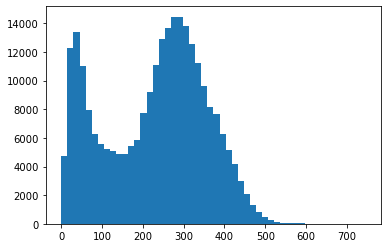

In [74]:
plt.hist(pickups,bins=50)

the function .hist(...). is a histogram plot function in matplolib. Do you want to try it?

hhmmm... was this what you were expecting?... 

Another interesting way to look at this data is simply by plotting directly with a scatter plot, where the x axis is the index of the datapoint, and the y axis is the total number of pickups.

Tip: to see better the data try playing with the size of the dots (for example, put s=0.1 as an argument to the scatter call) and the transparency of the graph plot (using the alpha attribute). By default, alpha=1. If you would like to form the graph plot more transparent, you can make alpha less than 1, such as 0.5 or 0.25.

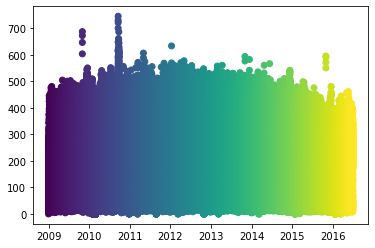

In [98]:

plt.scatter(date, pickups, c = np.arange(0,len(pickups)))#"blue",s=0.1)
#np.arange(0,len(pickups))

This sort of pattern is intriguing. There seems to be two general "trends" of taxi pickups in this area. Do you think it relates with time of day? It would make some sense (e.g. during the night, low values, during peak hours, high values). 

There are many ways to check this, but a simple one is to make a small change in the temporal vector. Instead of each element of this vector corresponding to absolute time (the *actual* date and time), why not just represent the minutes since midnight? 

Can you make a new vector with that content?

**Tip on how to get the hour and minute**:
>from datetime import datetime as dt
>
>s="2017-09-11 18:35:11"
>
>d=dt.strptime(s, "%Y-%m-%d %H:%M:%S")
>
>print(d)
>
>print(d.hour)
>
>print(d.minute)
>

Output:

2017-09-11 18:35:11

18

35

In [92]:
from datetime import datetime as dt

date=[]
for line in lines[1:]:
    split=line.split(',')
    d=dt.strptime(split[0], "%Y-%m-%d")
    d=d.replace(hour=int(split[1]), minute=int(split[2]))
    date.append(d)  #conversion to an integer
print(d)
print(date[:10])

2016-06-30 23:45:00
[datetime.datetime(2009, 1, 1, 0, 0), datetime.datetime(2009, 1, 1, 0, 15), datetime.datetime(2009, 1, 1, 0, 30), datetime.datetime(2009, 1, 1, 0, 45), datetime.datetime(2009, 1, 1, 1, 0), datetime.datetime(2009, 1, 1, 1, 15), datetime.datetime(2009, 1, 1, 1, 30), datetime.datetime(2009, 1, 1, 1, 45), datetime.datetime(2009, 1, 1, 2, 0), datetime.datetime(2009, 1, 1, 2, 15)]


Ok, now for a cool trick. In Python (well, in general), you ultimately define colors with numbers. So, imagine that the number of minutes since midnight (that you just created) corresponds to a color. The function scatter allows you to give this list straight away and plot it (just use the argument c, for example "c=my_minute_since_midnight_list")). 

Do you want to try?

In [ ]:

c = np.arange(0,len(pickups)))

Doesn't this explain something?  ;-)

Ok, so there seems to be indeed a relationship with time! 

If this is true, it may be interesting to do a 24-hr average plot. In other words, a plot where the x axis is 0 to 1440 (1440=24 hours X 60 minutes), and you show the average per minute.

BTW, it will also be very useful if you add the 5 and 95 quantiles. 

Do you want to do this?

Ok, again, you did a lot of stuff. Why not reorganize it again?

For example, a new function that receives the file name, and generates all the graphs you did so far.

Wouldn't it be cool to just generate those by a single command?

### Correlations

One very important task in Data Science modeling is to find (and understand) correlations between different variables. Let's do a few simple exercises.

Let's start with a simple question: are the different areas correlated between them? If yes, it may be interesting knowledge. For example, maybe we can share data between them to predict better, later.



In [85]:
s1,_ =read_csv("pickups_zone_1_15min.csv")
s17, _=read_csv("pickups_zone_17_15min.csv")
s21, _=read_csv("pickups_zone_21_15min.csv")
s28, _=read_csv("pickups_zone_28_15min.csv")

np.corrcoef([s1, s17, s21, s28])

AttributeError: 'str' object has no attribute 'readlines'

It seems all but area 28 are well correlated with each other. Can that show, in the pictures above?

Now, a more interesting question: are there correlations between a given area, and the other areas in earlier time steps? 

This is a VERY important one. If you find high correlation, for example, between area 1 at time t, with area 17 at time t-1, then you can use area 17 to predict area 1!

To check this, you need to play a little bit with the vectors. Let's call a vector that is shifted in time for 1 time step, a "lag1" vector.:

In [84]:
s1_trimmed=np.array(s1[1:]) #look, it's the SAME vector, except that you start on the second element. Why?
s21_lag1=np.array(s21[:-1]) #if this is confusing you now, please ask the teacher to explain. 
s17_lag1=np.array(s17[:-1])#With a white board near, it will be easy to understand! ;-)

NameError: name 's1' is not defined

Let's now check those correlations

In [200]:
np.corrcoef([s1_trimmed, s17_lag1, s21_lag1])

array([[ 1.        ,  0.89489521,  0.86013243],
       [ 0.89489521,  1.        ,  0.82631008],
       [ 0.86013243,  0.82631008,  1.        ]])

WOW! Very interesting!! This means that you can use data from these other areas to predict for area 1... This is useful when there is missing data in area 1, for example... 

Try to replicate this same study, for all different areas. To make it quick, you can define a function that receives the area you want to "predict for", and the areas you want to use as "predictors".

An idea: check the correlation between the series "s1" and the series "s1_lag1". This is called the autocorrelation of lag 1 of the time series. 

Now, do this with lag=2

Ok, the last couple of tasks for today: 

Create a list, let's call it "auto_s1", with the autocorrelations with all lags until 120

Now, make a plot such that The x axis is the range(1,120), and y axis is the auto_s1 list. 

The resulting diagram is called an autocorrelogram! :-) What do you think? Can you explain what's happening in those bumps?